In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np

In [60]:
df = yf.download('BTC-USD', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [61]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [62]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [63]:
def lagit(df, lags):
  names = []
  for i in range(1, lags + 1):
    df['Lag_'+str(i)] = df['returns'].shift(i)
    df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in df['Lag_'+str(i)]]
    names.append('Lag_'+str(i)+'_dir')
  return names

In [64]:
dirnames = lagit(df, 2)

In [65]:
dirnames

['Lag_1_dir', 'Lag_2_dir']

In [66]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir
Date,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,-1,NaN,-1,NaN,-1
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.030273,-1,NaN,-1,NaN,-1
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.050172,1,-0.030273,-1,NaN,-1
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008915,1,0.050172,1,-0.030273,-1
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089,1,0.008915,1,0.050172,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,0.022183,1,-0.064747,-1,0.002076,1
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,-0.025365,-1,0.022183,1,-0.064747,-1
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,0.004317,1,-0.025365,-1,0.022183,1


In [67]:
df.dropna(inplace=True)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()

In [70]:
model.fit(df[dirnames], df['direction'])

LogisticRegression()

In [71]:
df['prediction_Logit'] = model.predict(df[dirnames])

In [86]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,prediction_Logit,strat_Logit
Date,,,,,,,,,,,,,,
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008915,1,0.050172,1,-0.030273,-1,-1,-0.008915
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089,1,0.008915,1,0.050172,1,-1,-0.000089
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,0.047161,1,0.000089,1,0.008915,1,-1,-0.047161
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327,0.049527,1,0.047161,1,0.000089,1,-1,-0.049527
2020-01-08,8161.935547,8396.738281,7956.774414,8079.862793,8079.862793,31672559265,-0.010322,-1,0.049527,1,0.047161,1,-1,0.010322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,0.022183,1,-0.064747,-1,0.002076,1,1,0.022183
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,-0.025365,-1,0.022183,1,-0.064747,-1,-1,0.025365
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,0.004317,1,-0.025365,-1,0.022183,1,1,0.004317


In [73]:
df['strat_Logit'] = df['prediction_Logit'] * df['returns']

In [74]:
np.exp(df[['returns', 'strat_Logit']].sum())

returns        4.249489
strat_Logit    7.336503
dtype: float64

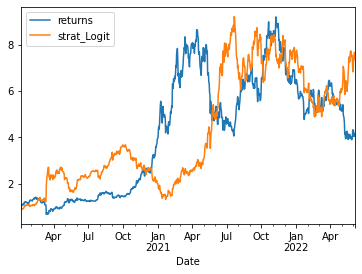

In [75]:
np.exp(df[['returns', 'strat_Logit']].cumsum()).plot()

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train, test = train_test_split(df, shuffle=False, test_size=0.25, random_state=0)

In [78]:
train = train.copy()

In [79]:
test = test.copy()

In [80]:
model = LogisticRegression()

In [81]:
model.fit(train[dirnames], train['direction'])

LogisticRegression()

In [82]:
test['prediction_Logit'] = model.predict(test[dirnames])

In [83]:
test['strat_Logit'] = test['prediction_Logit'] * test['returns']

In [84]:
np.exp(test[['returns', 'strat_Logit']].sum())

returns        0.533699
strat_Logit    0.540514
dtype: float64

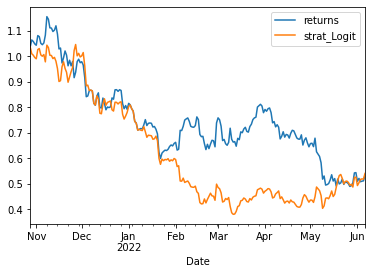

In [85]:
np.exp(test[['returns', 'strat_Logit']].cumsum()).plot()

In [56]:
from sklearn import metrics

In [57]:
metrics.confusion_matrix(test['direction'], test['prediction_Logit'])

array([[37, 40],
       [39, 36]])

In [59]:
print(metrics.classification_report(test['direction'], test['prediction_Logit']))

              precision    recall  f1-score   support

          -1       0.49      0.48      0.48        77
           1       0.47      0.48      0.48        75

    accuracy                           0.48       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.48      0.48      0.48       152

